# Conll2003 Dataset - NER task - BERT and ELECTRA

In [ ]:
pip install transformers

In [ ]:
pip install datasets

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
pip install imblearn

In [ ]:
!pip install seqeval

In [ ]:
pip install evaluate

In [ ]:
!pip install accelerate -U

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from transformers import BertTokenizer
from datasets import DatasetDict, Dataset
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
#from imblearn.over_sampling import SMOTE
from transformers import AutoModelForTokenClassification

In [ ]:
from datasets import load_dataset

In [ ]:
raw_datasets = load_dataset("conll2003")
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [ ]:
#raw = pd.DataFrame(raw_datasets["train"])

In [ ]:
dataset = load_dataset('conll2003', split='train+validation+test')
df = pd.DataFrame(dataset)
#df.sample(frac=1).reset_index(drop=True, inplace=True)

In [ ]:
df = df.drop(["id"],axis =1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20744 entries, 0 to 20743
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tokens      20744 non-null  object
 1   pos_tags    20744 non-null  object
 2   chunk_tags  20744 non-null  object
 3   ner_tags    20744 non-null  object
dtypes: object(4)
memory usage: 648.4+ KB


In [ ]:
df[df['tokens'].duplicated()].count()

tokens        2013
pos_tags      2013
chunk_tags    2013
ner_tags      2013
dtype: int64

In [ ]:
#df[df['tokens'].duplicated() | df['tokens'].duplicated(keep='last')]

In [ ]:
df.drop(df[df['tokens'].duplicated()].index, inplace = True)

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.drop('index',axis=1,inplace=True)

In [ ]:
df

,tokens,pos_tags,chunk_tags,ner_tags
0,"[EU, rejects, German, call, to, boycott, Briti...","[22, 42, 16, 21, 35, 37, 16, 21, 7]","[11, 21, 11, 12, 21, 22, 11, 12, 0]","[3, 0, 7, 0, 0, 0, 7, 0, 0]"
1,"[Peter, Blackburn]","[22, 22]","[11, 12]","[1, 2]"
2,"[BRUSSELS, 1996-08-22]","[22, 11]","[11, 12]","[5, 0]"
3,"[The, European, Commission, said, on, Thursday...","[12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 3...","[11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 1...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ..."
4,"[Germany, 's, representative, to, the, Europea...","[22, 27, 21, 35, 12, 22, 22, 27, 16, 21, 22, 2...","[11, 11, 12, 13, 11, 12, 12, 11, 12, 12, 12, 1...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ..."
...,...,...,...,...
18726,"[That, is, why, this, is, so, emotional, a, ni...","[12, 42, 46, 12, 42, 30, 16, 12, 21, 15, 28, 6...","[11, 21, 3, 11, 21, 1, 2, 11, 12, 13, 11, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
18727,"["", It, was, the, joy, that, we, all, had, ove...","[0, 28, 38, 12, 21, 15, 28, 12, 38, 15, 12, 21...","[0, 11, 21, 11, 12, 17, 11, 11, 21, 13, 11, 12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18728,"[Charlton, managed, Ireland, for, 93, matches,...","[22, 38, 22, 15, 11, 24, 6, 15, 43, 21, 28, 38...","[11, 21, 11, 13, 11, 12, 0, 13, 11, 12, 11, 21...","[1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18729,"[He, guided, Ireland, to, two, successive, Wor...","[28, 38, 22, 35, 11, 16, 22, 22, 24, 24, 10, 3...","[11, 21, 11, 21, 11, 12, 12, 12, 12, 12, 0, 13...","[0, 0, 5, 0, 0, 0, 7, 8, 0, 0, 0, 0, 0, 0, 7, ..."


In [ ]:
#@title BERT TRANSFORMER
from transformers import AutoTokenizer

model_checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
inputs = tokenizer(df["tokens"][0], is_split_into_words=True)
inputs.tokens()

['[CLS]',
 'EU',
 'rejects',
 'German',
 'call',
 'to',
 'boycott',
 'British',
 'la',
 '##mb',
 '.',
 '[SEP]']

In [ ]:
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

In [ ]:
labels = df["ner_tags"][0]
word_ids = inputs.word_ids()
print(labels)
print(align_labels_with_tokens(labels, word_ids))

[3, 0, 7, 0, 0, 0, 7, 0, 0]
[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100]


In [ ]:
# convert the dataframe to a Hugging Face Dataset object
dataset = Dataset.from_pandas(df)

# create a DatasetDict object
dataset_dict = DatasetDict({'data': dataset})

# print the DatasetDict object
print(dataset_dict)

DatasetDict({
    data: Dataset({
        features: ['tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 18731
    })
})


In [ ]:
dataset_dict['data']

Dataset({
    features: ['tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
    num_rows: 18731
})

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True
    )
    all_labels = examples["ner_tags"]
    new_labels = []
    for i, labels in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(i)
        new_labels.append(align_labels_with_tokens(labels, word_ids))

    tokenized_inputs["labels"] = new_labels
    return tokenized_inputs

In [ ]:
tokenized_datasets = dataset_dict.map(
    tokenize_and_align_labels,
    batched=True,
    remove_columns=dataset_dict["data"].column_names,
)

Map:   0%|          | 0/18731 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

DatasetDict({
    data: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 18731
    })
})

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [ ]:
batch = data_collator(tokenized_datasets["data"])

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
#batch['labels']

In [ ]:
#pd.DataFrame({'input_ids': batch['input_ids'], 'token_type_ids': batch['token_type_ids'], 'attention_mask': batch['attention_mask'], 'labels': batch['labels']})
batch_df = pd.DataFrame({'input_ids': batch['input_ids'].tolist(), 'token_type_ids': batch['token_type_ids'].tolist(), 'attention_mask': batch['attention_mask'].tolist(), 'labels': batch['labels'].tolist()})

In [ ]:
batch_df['input_ids'].str.len().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        173
1        173
2        173
3        173
4        173
        ... 
18726    173
18727    173
18728    173
18729    173
18730    173
Name: input_ids, Length: 18731, dtype: int64>

In [ ]:
batch_df[batch_df['input_ids'].duplicated()].count()

input_ids         5
token_type_ids    5
attention_mask    5
labels            5
dtype: int64

In [ ]:
batch_df.drop(batch_df[batch_df['input_ids'].duplicated()].index, inplace = True)

In [ ]:
batch_df

,input_ids,token_type_ids,attention_mask,labels
0,"[101, 7270, 22961, 1528, 1840, 1106, 21423, 14...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, 0, -100, -10..."
1,"[101, 1943, 14428, 102, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 1, 2, -100, -100, -100, -100, -100, -10..."
2,"[101, 26660, 13329, 12649, 15928, 1820, 118, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[-100, 5, 6, 6, 6, 0, 0, 0, 0, 0, -100, -100, ..."
3,"[101, 1109, 1735, 2827, 1163, 1113, 9170, 1122...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ..."
4,"[101, 1860, 112, 188, 4702, 1106, 1103, 1735, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 5, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 1, ..."
...,...,...,...,...
18726,"[101, 1337, 1110, 1725, 1142, 1110, 1177, 6438...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18727,"[101, 107, 1135, 1108, 1103, 8730, 1115, 1195,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18728,"[101, 19155, 2374, 2270, 1111, 5429, 2697, 117...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18729,"[101, 1124, 8610, 2270, 1106, 1160, 11598, 129...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 5, 0, 0, 0, 7, 8, 0, 0, 0, 0, 0, ..."


In [ ]:
train_df, test_df = train_test_split(batch_df, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)

In [ ]:
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)
val_df.reset_index(drop=True,inplace=True)

In [ ]:
# create a DatasetDict object
train = Dataset.from_pandas(train_df)
test = Dataset.from_pandas(test_df)
validation = Dataset.from_pandas(val_df)
transformed_dataset = DatasetDict({'train': train, 'test': test,'validation': validation})

In [ ]:
transformed_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 14980
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1873
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1873
    })
})

#Data Statistics

In [ ]:
import itertools
# flattening the list and storing the result
flat_list_input_ids = itertools.chain(*batch_df['input_ids'])
flat_list_value = list(flat_list_input_ids)

flat_list_label = itertools.chain(*batch_df['labels'])
flat_list_label_value = list(flat_list_label)

In [ ]:
#@title
# Access the encoded sequences as a list of lists of integers representing the token IDs
#input_ids = tokenized_datasets["input_ids"]

# Convert the token IDs back into tokens
tokens = [tokenizer.convert_ids_to_tokens(ids) for ids in flat_list_value]
tokens_df = pd.DataFrame(tokens, columns = ['tokens'])

In [ ]:
tokens_df.head(5)

,tokens
0,[CLS]
1,EU
2,rejects
3,German
4,call


In [ ]:
flat_list_label_value = pd.DataFrame(flat_list_label_value, columns = ['labels'])

In [ ]:
flat_list_label_value.groupby('labels').size().sort_values(ascending=False)

labels
-100    2853973
 0       295616
 2        24231
 4        17525
 1         9911
 5         9836
 6         9404
 3         8806
 8         5460
 7         4836
dtype: int64

In [ ]:
transformed_label = flat_list_label_value.replace({0:'O', 1:'B-PER', 2:'I-PER',3: 'B-ORG', 4:'I-ORG', 5:'B-LOC', 6:'I-LOC', 7:'B-MISC', 8:'I-MISC', -100:'PAD'})
transformed_label

,labels
0,PAD
1,B-ORG
2,O
3,B-MISC
4,O
...,...
3239593,PAD
3239594,PAD
3239595,PAD
3239596,PAD


In [ ]:
transformed_label.groupby('labels').size().sort_values(ascending=False)

labels
PAD       2853973
O          295616
I-PER       24231
I-ORG       17525
B-PER        9911
B-LOC        9836
I-LOC        9404
B-ORG        8806
I-MISC       5460
B-MISC       4836
dtype: int64

<Axes: xlabel='labels'>

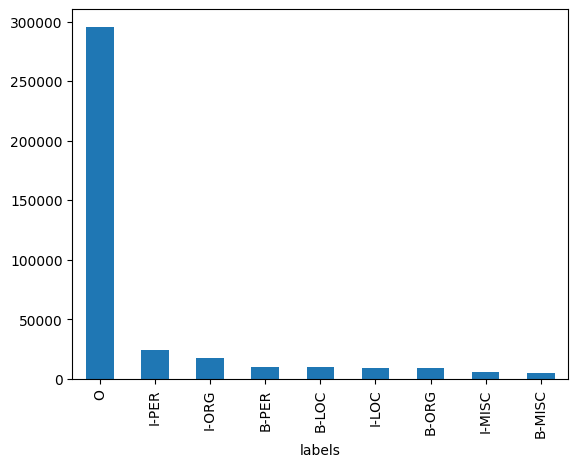

In [ ]:
transformed_label.groupby('labels').size().sort_values(ascending=False)[1:].plot(kind='bar')

In [ ]:
tokens_df.groupby('tokens').size().sort_values(ascending=False)

tokens
[PAD]          2816521
[SEP]            18726
[CLS]            18726
.                17614
,                11739
                ...   
##rated              1
programming          1
programs             1
credits              1
contestant           1
Length: 16340, dtype: int64

In [ ]:
top_30 = tokens_df.groupby('tokens').size().sort_values(ascending=False)[30:71]

<Axes: xlabel='tokens'>

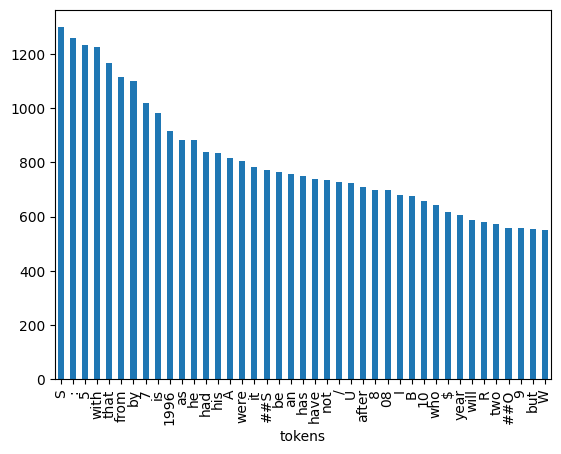

In [ ]:
top_30.plot(kind='bar')

In [ ]:
#tokenized_df = pd.DataFrame({'tokens': tokenized_datasets['data']tokens, 'labels': tokenized_datasets['data']['labels']})
#tokenized_df
#pd.DataFrame({'input_ids': tokenized_datasets['data']['input_ids'], 'token_type_ids': tokenized_datasets['data']['token_type_ids'], 'attention_mask': tokenized_datasets['data']['attention_mask'], 'labels': tokenized_datasets['data']['labels']})

#Evaluation Metrics

In [ ]:
import evaluate

metric = evaluate.load("seqeval")

In [ ]:
#metrics
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_names[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"],
    }

#PRETRAINED

In [ ]:
id2label_new = {0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC',
 7: 'B-MISC',
 8: 'I-MISC',
-100: 'PAD'}

In [ ]:
label2id_new = {'O': 0,
 'B-PER': 1,
 'I-PER': 2,
 'B-ORG': 3,
 'I-ORG': 4,
 'B-LOC': 5,
 'I-LOC': 6,
 'B-MISC': 7,
 'I-MISC': 8,
 'PAD': -100}

In [ ]:
from transformers import AutoTokenizer, BertForTokenClassification
import torch

model = BertForTokenClassification.from_pretrained("bert-base-cased",num_labels = 10,id2label=id2label_new,label2id=label2id_new)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

input_ids = torch.tensor(transformed_dataset["validation"]["input_ids"]).to(device)
attention_masks = torch.tensor(transformed_dataset["validation"]["attention_mask"]).to(device)
token_type_ids = torch.tensor(transformed_dataset["validation"]["token_type_ids"]).to(device)

with torch.no_grad():
  outputs = model(input_ids, attention_mask=attention_masks,token_type_ids=token_type_ids)

In [ ]:
predicted_label = outputs.logits.argmax(dim=2).cpu().numpy()

In [ ]:
predicted_label

array([[6, 6, 6, ..., 6, 6, 6],
       [0, 0, 6, ..., 4, 4, 4],
       [0, 0, 0, ..., 6, 4, 4],
       ...,
       [5, 6, 4, ..., 4, 4, 4],
       [6, 0, 6, ..., 6, 6, 6],
       [0, 0, 6, ..., 4, 4, 6]])

In [ ]:
true_label = transformed_dataset["validation"]["labels"]

In [ ]:
true_labels = [label for seq in true_label for label in seq]
predicted_labels = [label for seq in predicted_label for label in seq]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score for each NER class
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 1.38%
Precision: 1.92%
Recall: 1.38%
F1-Score: 1.35%


#Model Development - BERT

In [ ]:
ner_feature = raw_datasets["train"].features["ner_tags"]
ner_feature

label_names = ner_feature.feature.names
label_names

id2label = {i: label for i, label in enumerate(label_names)}
label2id = {v: k for k, v in id2label.items()}

In [ ]:
model = AutoModelForTokenClassification.from_pretrained(
    model_checkpoint,
    id2label=id2label,
    label2id=label2id,
)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config.num_labels

9

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import TrainingArguments

args = TrainingArguments(
    "bert-finetuned-ner",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=True,
    #hub_model_id="hoangkhanhnghi/bert-finetuned-ner"
)

In [ ]:
cd /content/bert-finetuned-ner

[Errno 2] No such file or directory: '/content/bert-finetuned-ner'
/content


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=transformed_dataset["train"],
    eval_dataset=transformed_dataset["validation"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)
trainer.train()

Cloning https://huggingface.co/hoangkhanhnghi/bert-finetuned-ner into local empty directory.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.085600,0.074560,0.903647,0.919734,0.911620,0.980914
2,0.039900,0.073268,0.932493,0.937839,0.935159,0.983886
3,0.025300,0.079640,0.930108,0.939650,0.934854,0.983651


TrainOutput(global_step=5619, training_loss=0.0678968530975005, metrics={'train_runtime': 59733.4794, 'train_samples_per_second': 0.752, 'train_steps_per_second': 0.094, 'total_flos': 3967991321190120.0, 'train_loss': 0.0678968530975005, 'epoch': 3.0})

# MODEL DEVELOPMENT - ELECTRA

In [ ]:
electra_model_checkpoint = "google/electra-base-discriminator"

In [ ]:
electra_model = AutoModelForTokenClassification.from_pretrained(
    electra_model_checkpoint,
    id2label=id2label,
    label2id=label2id,
)

Some weights of ElectraForTokenClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

electra_args = TrainingArguments(
    "electra-finetuned-ner-task",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=True,
    #hub_model_id="hoangkhanhnghi/electra-finetuned-ner"
)

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import Trainer

electra_trainer = Trainer(
    model=electra_model,
    args=electra_args,
    train_dataset=transformed_dataset["train"],
    eval_dataset=transformed_dataset["validation"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)
electra_trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.567500,0.411230,0.452733,0.397405,0.423269,0.873905
2,0.355400,0.312666,0.570153,0.539529,0.554419,0.905533
3,0.263800,0.273061,0.582991,0.599879,0.591315,0.917736


TrainOutput(global_step=5619, training_loss=0.4572716153035026, metrics={'train_runtime': 541.0199, 'train_samples_per_second': 83.065, 'train_steps_per_second': 10.386, 'total_flos': 3967991321190120.0, 'train_loss': 0.4572716153035026, 'epoch': 3.0})

# BERT BASELINE

In [ ]:
from transformers import DataCollatorForTokenClassification, Trainer, TrainingArguments, AutoTokenizer, AutoModelForTokenClassification
training_args = TrainingArguments(
    per_device_eval_batch_size=8,
    output_dir='./results',
)

non_finetuned_model = AutoModelForTokenClassification.from_pretrained("bert-base-cased", num_labels=len(raw_datasets["train"].features["ner_tags"].feature.names))

trainer_baseline = Trainer(
    model=non_finetuned_model,
    args=training_args,
    data_collator=data_collator,
    eval_dataset=transformed_dataset["validation"],
    compute_metrics=compute_metrics,  # pass the compute_metrics function here
)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
baseline_result = trainer_baseline.evaluate()

In [ ]:
baseline_result

{'eval_loss': 2.23443341255188,
 'eval_precision': 0.0057833405265429435,
 'eval_recall': 0.04043452021726011,
 'eval_f1': 0.010119317323667118,
 'eval_accuracy': 0.06685440133500209,
 'eval_runtime': 11.0987,
 'eval_samples_per_second': 168.758,
 'eval_steps_per_second': 21.174}